# 1: Import Libraries & Configure Library Settings

## 1.1: Import Libraries

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2: Configure Library Settings

In [4]:
# Set visualization style for plots
sns.set_style("whitegrid")

# Set display options for better readability
pd.set_option("display.max_colwidth", None)

# 2: DataFrame Preparation

## 2.1: Load DataFrame Features

In [5]:
# Load file
features = pd.read_csv("Datasets/UNSW-NB15 - Features.csv", encoding="latin-1")

# Preview DataFrame
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


## 2.2: Load Network Data

In [6]:
# Load files
df1 = pd.read_csv("Datasets/UNSW-NB15 - 1.csv", header=None, low_memory=False)
df2 = pd.read_csv("Datasets/UNSW-NB15 - 2.csv", header=None, low_memory=False)
df3 = pd.read_csv("Datasets/UNSW-NB15 - 3.csv", header=None, low_memory=False)
df4 = pd.read_csv("Datasets/UNSW-NB15 - 4.csv", header=None, low_memory=False)

# Preview first DataFrame
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


## 2.3: Combine DataFrames

In [7]:
# Combine DataFrames
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Preview combined DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


## 2.4: Change Column Headers of DataFrame

In [8]:
# Get column headers
column_names = features["Name"].tolist()
print(f"Column names: {column_names}")

# Change column headers
df.columns = column_names

# Preview complete combined DataFrame
df.head()

Column names: ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


# 3: Data Profiling

## 3.1: Number of Features and Records

In [9]:
# View number of features and records
number_of_initial_features = df.shape[1]
number_of_initial_records = df.shape[0]
print(f"Total number of features: {number_of_initial_features}")
print(f"Total number of records: {number_of_initial_records}")

Total number of features: 49
Total number of records: 2540047


## 3.2: DataFrame Info

In [10]:
# View info
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             str    
 1   sport             object 
 2   dstip             str    
 3   dsport            str    
 4   proto             str    
 5   state             str    
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           str    
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit              float64

## 3.3: DataFrame Statistics

In [11]:
# View statistics
print(df.describe())

                dur        sbytes        dbytes          sttl          dttl  \
count  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06   
mean   6.587916e-01  4.339600e+03  3.642759e+04  6.278197e+01  3.076681e+01   
std    1.392493e+01  5.640599e+04  1.610960e+05  7.462277e+01  4.285089e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.037000e-03  2.000000e+02  1.780000e+02  3.100000e+01  2.900000e+01   
50%    1.586100e-02  1.470000e+03  1.820000e+03  3.100000e+01  2.900000e+01   
75%    2.145545e-01  3.182000e+03  1.489400e+04  3.100000e+01  2.900000e+01   
max    8.786638e+03  1.435577e+07  1.465753e+07  2.550000e+02  2.540000e+02   

              sloss         dloss         Sload         Dload         Spkts  \
count  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06  2.540047e+06   
mean   5.163921e+00  1.632944e+01  3.695645e+07  2.450861e+06  3.328884e+01   
std    2.251707e+01  5.659474e+01  1.186043e+08  4.

## 3.4: Distribution of Label Features

In [12]:
# View traffic type distribution
print(df["Label"].value_counts())

Label
0    2218764
1     321283
Name: count, dtype: int64


In [13]:
# View attack category distribution
print(df["attack_cat"].value_counts())

attack_cat
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: count, dtype: int64


# 4: Data Cleaning

## 4.1: Back Up DataFrame

In [14]:
# Back up DataFrame
df_backup = df.copy()

## 4.2: Strip Whitespace from String Columns

In [15]:
# Strip whitespace
df = df.apply(lambda x: x.str.strip() if x.dtype == "str" else x)

## 4.3: Drop Redundant Features

In [16]:
# Drop protocol-specific features (HTTP/FTP only)
# These only work for specific protocols and are not useful for multiprotocol attack detection
protocol_specific = ["ct_flw_http_mthd", "is_ftp_login", "ct_ftp_cmd"]

# Drop random features
# Source ports are randomly assigned
random = ["sport"]

# Drop identifiers and timestamps
# IP addresses and times do not represent attack patterns
identifiers = ["srcip", "dstip", "Stime", "Ltime"]

# Drop redundant features
# tcprtt is derived from other features (tcprtt = synack + ackdat)
redundant = ["tcprtt"]

# Combine features to drop into a list
features_to_drop = protocol_specific + random + identifiers + redundant

# Drop all redundant features
df.drop(columns=features_to_drop, inplace=True)

## 4.4: Handle Missing Values

In [17]:
# Check for missing values
print("Features with missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Features with missing values:
attack_cat    2218764
dtype: int64


In [18]:
# Check number of records of normal traffic
print(df.loc[df["attack_cat"].isnull(), "Label"].value_counts())

Label
0    2218764
Name: count, dtype: int64


In [19]:
# Fill all missing 'attack_cat' with 'Normal'
df["attack_cat"] = df["attack_cat"].fillna("Normal")

# Check for missing values
missing_values = df.isnull().sum()
print("Features with missing values:")
print(missing_values[missing_values > 0])

Features with missing values:
Series([], dtype: int64)


## 4.5: Remove Duplicate Attack Categories

In [20]:
# Identify attack categories
print(df["attack_cat"].unique())

<StringArray>
[        'Normal',       'Exploits', 'Reconnaissance',            'DoS',
        'Generic',      'Shellcode',        'Fuzzers',          'Worms',
      'Backdoors',       'Analysis',       'Backdoor']
Length: 11, dtype: str


In [21]:
# Combine 'Backdoors' and 'Backdoor' into one attack category
df["attack_cat"] = df["attack_cat"].replace("Backdoor", "Backdoors")

In [22]:
# Identify attack categories
print(df["attack_cat"].unique())

<StringArray>
[        'Normal',       'Exploits', 'Reconnaissance',            'DoS',
        'Generic',      'Shellcode',        'Fuzzers',          'Worms',
      'Backdoors',       'Analysis']
Length: 10, dtype: str


## 4.6: Remove Duplicate Records

In [23]:
# Check for duplicate records
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicated records: 512647


In [24]:
# Remove duplicate records
df = df.drop_duplicates()

## 4.7: Check Numeric Columns for Infinite Values

In [25]:
# Check for infinite values in numeric columns
infinite_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"Number of infinite values: {infinite_count}")

Number of infinite values: 0


## 4.8: Remove Records with Zero Duration with Data Transfer

In [26]:
# Identify rows with zero duration with data transfer
zero_duration_data_mask = (df["dur"] == 0) & ((df["sbytes"] > 0) | (df["dbytes"] > 0))

# Remove rows
df = df[~zero_duration_data_mask]

## 4.9: View new DataFrame Properties

### 4.9.1: Number of Features and Records

In [36]:
# View changes to the number of features and records
print(f"Total number of features: {df.shape[1]}")
print(f"Total number of records: {df.shape[0]}")
print(f"Number of features removed: {number_of_initial_features - df.shape[1]}")
print(f"Number of records removed: {number_of_initial_records - df.shape[0]}")
print(f"Features removed: {features_to_drop}")

Total number of features: 40
Total number of records: 2024600
Number of features removed: 9
Number of records removed: 515447
Features removed: ['ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'sport', 'srcip', 'dstip', 'Stime', 'Ltime', 'tcprtt']


### 4.9.2: DataFrame Info

In [28]:
# View info
print(df.info())

<class 'pandas.DataFrame'>
Index: 2024600 entries, 0 to 2540046
Data columns (total 40 columns):
 #   Column            Dtype  
---  ------            -----  
 0   dsport            str    
 1   proto             str    
 2   state             str    
 3   dur               float64
 4   sbytes            int64  
 5   dbytes            int64  
 6   sttl              int64  
 7   dttl              int64  
 8   sloss             int64  
 9   dloss             int64  
 10  service           str    
 11  Sload             float64
 12  Dload             float64
 13  Spkts             int64  
 14  Dpkts             int64  
 15  swin              int64  
 16  dwin              int64  
 17  stcpb             int64  
 18  dtcpb             int64  
 19  smeansz           int64  
 20  dmeansz           int64  
 21  trans_depth       int64  
 22  res_bdy_len       int64  
 23  Sjit              float64
 24  Djit              float64
 25  Sintpkt           float64
 26  Dintpkt           float64
 27 

### 4.9.3: DataFrame Statistics

In [29]:
# View statistics
print(df.describe())

                dur        sbytes        dbytes          sttl          dttl  \
count  2.024600e+06  2.024600e+06  2.024600e+06  2.024600e+06  2.024600e+06   
mean   6.548479e-01  5.161757e+03  4.261206e+04  4.233308e+01  3.702926e+01   
std    1.112185e+01  6.256330e+04  1.711657e+05  4.805128e+01  4.386239e+01   
min    1.000000e-06  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.162000e-03  5.200000e+02  3.040000e+02  3.100000e+01  2.900000e+01   
50%    2.790200e-02  1.836000e+03  3.276000e+03  3.100000e+01  2.900000e+01   
75%    3.502245e-01  3.728000e+03  2.082600e+04  3.100000e+01  2.900000e+01   
max    8.786638e+03  1.435577e+07  1.465753e+07  2.550000e+02  2.540000e+02   

              sloss         dloss         Sload         Dload         Spkts  \
count  2.024600e+06  2.024600e+06  2.024600e+06  2.024600e+06  2.024600e+06   
mean   6.210752e+00  1.924391e+01  7.095575e+06  3.002647e+06  3.924387e+01   
std    2.474438e+01  5.996421e+01  6.866349e+07  4.

### 4.9.4: Distribution of Label Features

In [30]:
# View traffic type distribution
print(df["Label"].value_counts())

Label
0    1936327
1      88273
Name: count, dtype: int64


In [31]:
# View attack category distribution
print(df["attack_cat"].value_counts())

attack_cat
Normal            1936327
Exploits            27430
Fuzzers             20941
Generic             18826
Reconnaissance       9987
DoS                  5497
Analysis             2031
Backdoors            1879
Shellcode            1511
Worms                 171
Name: count, dtype: int64


# 5: Exploratory Data Analysis (EDA)

## 5.1: Distribution of Normal versus Attack Traffic

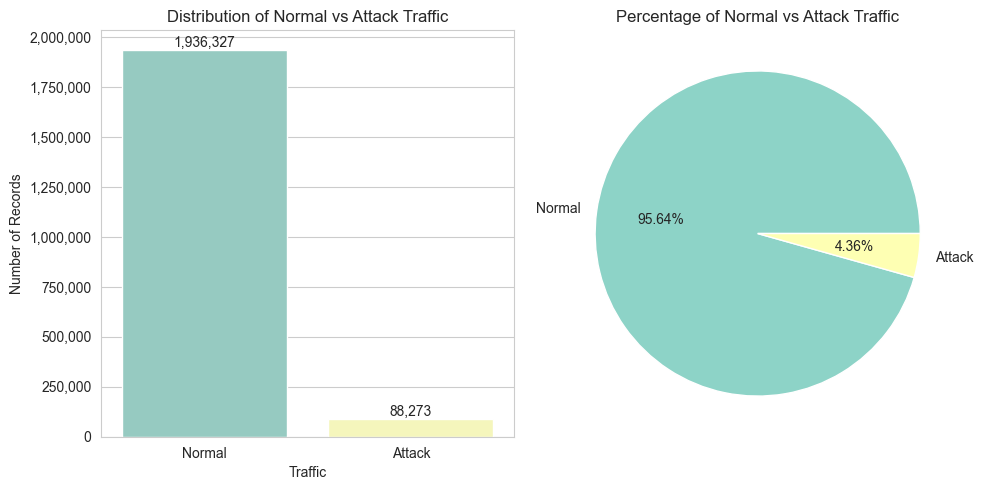

In [40]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot bar chart
sns.countplot(data=df, x="Label", hue="Label", ax=ax[0])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Normal", "Attack"])
ax[0].set_xlabel("Traffic")
ax[0].set_ylabel("Number of Records")
ax[0].set_title("Distribution of Normal vs Attack Traffic")
ax[0].get_legend().remove()

# Format y-axis to show complete numbers (not in scientific notation)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ",")))

# Add count values on top of bars
for container in ax[0].containers:

    # Convert height of each bar into a list of strings with commas as separators
    labels = [f"{bar_height:,.0f}" for bar_height in container.datavalues]

    # Apply formatted labels
    ax[0].bar_label(container, labels=labels)

# Plot pie chart
count = df["Label"].value_counts()
label_names = {0: "Normal", 1: "Attack"}
plt.pie(count, labels=[f"{label_names[i]}" for i in count.index], autopct=lambda p: f"{p:.2f}%")
ax[1].set_title("Percentage of Normal vs Attack Traffic")

plt.tight_layout()
plt.show()

## 5.2: Distribution of Attack Categories

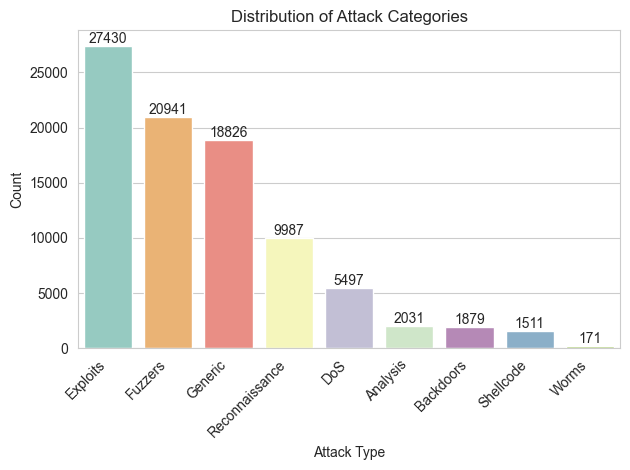

In [39]:
# Plot bar chart
ax = sns.countplot(data=df[df["Label"] == 1], x="attack_cat", hue="attack_cat", order=df[df["Label"] == 1]["attack_cat"].value_counts(ascending=False).index)
plt.title("Distribution of Attack Categories")
plt.xlabel("Attack Type")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Records")

# Add count values on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

## 5.3: Outlier Analysis

In [ ]:
# List of numeric features to check for outliers (Continuous & Count variables)
outlier_features = [

    # Volume & Duration (high values indicate DoS or exfiltration)
    "dur",    # Duration: Long durations may indicate slow-scan attacks or errors
    "sbytes", # Source Bytes: Massive volume indicates data exfiltration or DoS
    "dbytes", # Destination Bytes: High return traffic (e.g. amplification attacks)
    "Spkts",  # Source Packets: High packet count with low bytes -> DoS
    "Dpkts",  # Destination Packets: High packet count in response
    "Sload",  # Source Bits/Sec: Unusually high speed indicates anomalous bursts
    "Dload",  # Destination Bits/Sec: Unusually high speed indicates anomalous bursts

    # Packet Dynamics (loss & size indicate congestion or exploits)
    "sloss",       # Source Packets Dropped: High loss -> Network congestion or DoS
    "dloss",       # Destination Packets Dropped: High loss -> Network congestion or DoS
    "smeansz",     # Mean Packet Size (Source): Tiny packets -> Scan; Giant packets -> Buffer Overflow
    "dmeansz",     # Mean Packet Size (Destination): Tiny packets -> Scan; Giant packets -> Buffer Overflow
    "res_bdy_len", # Content Size: Unexpected payload sizes can indicate malware transfer

    # Time Dynamics (jitter & inter-arrival separate humans from bots)
    "Sjit",    # Source Jitter: High variance suggests network instability or evasion
    "Djit",    # Destination Jitter: High variance suggests network instability or evasion
    "Sintpkt", # Source Inter-packet Arrival: Regular intervals (low variance) -> Automated tools/Bots
    "Dintpkt", # Destination Inter-packet Arrival: Regular intervals (low variance) -> Automated tools/Bots
    "synack",  # TCP Syn-Ack Time: Delays here indicate network scanning or reachability issues
    "ackdat",  # TCP Ack-Data Time: Delays here indicate network scanning or reachability issues

    # Connection Counts ("ct_" features -> Critical for Scanning/DoS)
    # These count how many similar connections occurred in the last 100 events
    # Outliers here (e.g. 50+ connections) almost always signify port scans or flooding
    "ct_srv_src",       # Same service & source IP
    "ct_srv_dst",       # Same service & destination IP
    "ct_dst_ltm",       # Same destination IP (Last 100 connections)
    "ct_src_ ltm",      # Same source IP (Last 100 connections)
    "ct_src_dport_ltm", # Same source IP & dest port
    "ct_dst_sport_ltm", # Same destination IP & source port
    "ct_dst_src_ltm",   # Same destination IP & source IP
    "ct_state_ttl"      # Count of connections with same state & TTL
]

# Excluded numeric features
# 'dsport', 'proto', 'state', 'service' -> Categorical/Nominal
# 'sttl', 'dttl' -> Discrete (OS-dependent values like 64, 255)
# 'swin', 'dwin' -> Discrete (standard TCP window sizes like 255, 8192)
# 'stcpb', 'dtcpb' -> Random (sequence numbers are random identifiers)
# 'trans_depth' -> Discrete (small integer counts usually 0 or 1)
# 'is_sm_ips_ports', 'Label' -> Binary